# Spain Electricity Shortfall Regression Predict

## Team 5
- Rinae Tshivhidzo
- Tracy Zanele Lushaba
- Ngwanamorwaswi Ruth Mahlako
- Loveness Nkadimeng
- Cebisile Shezi
- Vuyisile Mvukela

## Introduction

### Awareness of the Problem

Electricity is a major contributor to a countries economic development, it is the wheel that drives most aspects of everyday life in society. Electricity is the key component to morden technologies and without it most of things we use everyday simply could not work. Many methods have been developed to generate electricity, this includes the use of fossil energy and renewable energy. Although the use of fossil energy has proven successful and adventageous when wanting to generate electricity on demand, they have also proven disadvantageous when it comes to impact it has on the environment. Renewable energy sources are proving to be a good alternative to generate electricity. The use of green energies such as solar power, wind power and hydro power, cities can minimise the use of traditional electrical energy sources and reduce CO2 emmission. Renewable energy sources are a favourable method as they do not harm the environment and most require low maintenace. 

#### Types of renewable energies
- Solar power

Solar power is defined as the conversion of sun's irradiance into electricity through the use of photovoltaic panel. The photovoltaic panel processes the sun's energy to craete an electricty current, this electricity which is in a form of direct current than travels into an invertor which converts the electricity into altenating current.  

- Wind power

Wind power is obtained by harnessing the energy of the wind to generate mechanical power through wind turbines. The twisting shape of the wind turbine blades is designed to capture energy from the wind. The turbine blades are connected to an electrical generator through a gearbox, the gears rotate a magnet within the generator that is surrounded by a metal coil to produce electricity. Wind farms are often found by the coast line or gaps between hills and mountains.


- Hydro power

Hydro power is atype of renewable energy that uses the power of water to generate electricity. Most common type is dam hydroelectric power plant. Water is stored reservoirs and released ehen energy is needed. Water released from the reservoirs flows through a turbine, turning it. The turning action from the turbine activates a genator to produce electricity.

![image.png](https://github.com/Rinae-D/load-shortfall-regression-predict-api/blob/master/electricity-pylon-3916954_960_720.webp?raw=1)


### Problem Statement

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments and estimates spending USD 14.8 million per year until 2030 for energy storage to decrease CO2 emissions. According to the official website of the International Trade Administration, Spain submitted a draft to the European Union in April 2020 detailing their Stragetic Energy and Climate Framework. This strategy details a plan to achieve up to 42 percent consumption of renewable energies out of the total energy use by the year 2030.
Therefore it is crucial that strategic methods are explored to achieve the expansion of the renewable energy resource infrastructure by 2030. 



### Objectives of the Research
The key objectives of this research project are as follow:

- Do data analysis to discover if there are errors and unnecessary data 
- Do data cleaning to remove errors and unnecessary data
- Do feature engineering to improve the performance of our moodel
- build a model that is capable of forecasting the hourly load shortfalls
- Predict the hourly load shortfalls
- evaluate the accuracy of the best machine learning model

 
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## Importing packages

In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
# Libraries for data preparation and model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score


# Setting global constants to ensure notebook results are reproducible
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


 <a id="two"></a>
## Loading the Data

In [ ]:
#load the train and test datasets
df_train =pd.read_csv('df_train.csv')
df_test=pd.read_csv('df_test.csv')

<a id="three"></a>
## Data Preprocessing

Data preprocessing refers to the technique of cleaning and organizing raw data to make it suitable for a building and training Machine Learning models.

In this section unecessary data will be droped,null values will be filled with mode, the train and test datasets will be merged so that all the data preprocessing is done simultaneously on both datasets.

In [ ]:
#view train dataset
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [ ]:
#view test dataset
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [ ]:
#combine train and test datasets
df=pd.concat([df_train,df_test])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


## Data size and Structure

The dataset given consists of object, integer and float variables. We have three object variables,one integer variable and 45 float variables. Only one variable contain null values. In total, there are 49 variables with 1 variable being the target (variable load_shortfall_3h). 


The predictor variables are broken down into the following types:

    -object: time,Valencia_wind_deg,and Seville_pressure
    -integer :  Unnamed
      
    -float: Madrid_wind_speed, Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed       ,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,and load_shortfall_3h  
    
   

Below, is a display of the variables.

In [ ]:
#looking at the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [ ]:
#looking at the shape of the dataset
df.shape

(11683, 49)

The dataset consist of 11683 row and 49 variables of which load_shortfall_3h is the target variable

## Handling missing values

In [ ]:
# Check for the sum and percentage of null values in each column

total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().mean() * 100).sort_values(ascending=False)
df_clean_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
df_clean_nans.head()

,Total NaN,Percent NaN
load_shortfall_3h,2920,24.993580
Valencia_pressure,2522,21.586921
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000


- From the table above it can be seen that Valencia_pressure has approximately 22% null values.
- load_shortfall_3h has approximately 25% null values this is because the test dataset does not have the depedent variable.



In [ ]:
# replacing missing values with mode.Mode is the most frequent value
df['Valencia_pressure']=df['Valencia_pressure'].fillna(df['Valencia_pressure'].mode()[0])

## Drop uncessary Data

In [ ]:
#drop the Unamed column beacause it is not useful 
df=df.drop(['Unnamed: 0'],axis=1)

 <a id="four"></a>
## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [ ]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1013.567063,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.146984,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1012.333333,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1016.666667,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333,800.000000,1018.000000,302.816667,1021.666667,297.159167,296.437500,801.666667,298.806667,8

__Skewness__ is the measure of the symmetry

In [ ]:
#Evaluating the skewness
df.skew()

Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -2.170499
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_max        0.068277
Valencia_temp 

___
We can see that some of our predictors are highly skewed(skew values less than -1 and greater than +1).While our response variable appears symmetrical(skew value close to 0).
 ____
 __Kurtosis__ is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
 

In [ ]:
#Evaluating the kurtosis
df.kurtosis()

Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          4.605919
Seville_temp_max          -0.596016
Madrid_pressure            3

The kurtosis of some of our predictor variables are much greater than 3. This indicates that there are strong outliers in the predictor variables. Outliers in a dataset like ours are natural. For example looking at rain, it is not consistant sometimes it can rain heavily sometimes it can rain lightly(drizzling). 

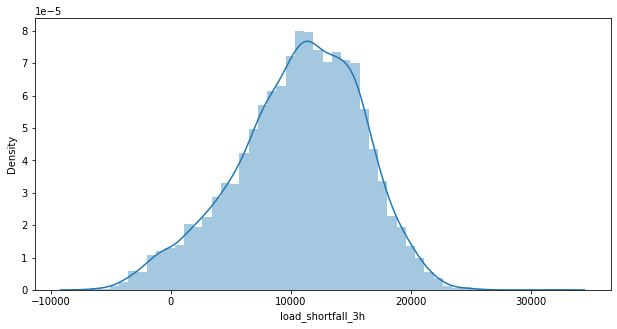

In [ ]:
# have a look at the distribution of the target variable
plt.figure(figsize=(20,5))               
plt.gcf().subplots_adjust(left = 0.5)
g = sns.distplot(df['load_shortfall_3h'], axlabel = 'load_shortfall_3h', label = 'count')
#sns.displot(data=df, x="load_shortfall_3h", kind="hist", bins = 35, aspect = 2)

Looking at the normal distribution of the target variable we can see that it is almost normaly distributed

---

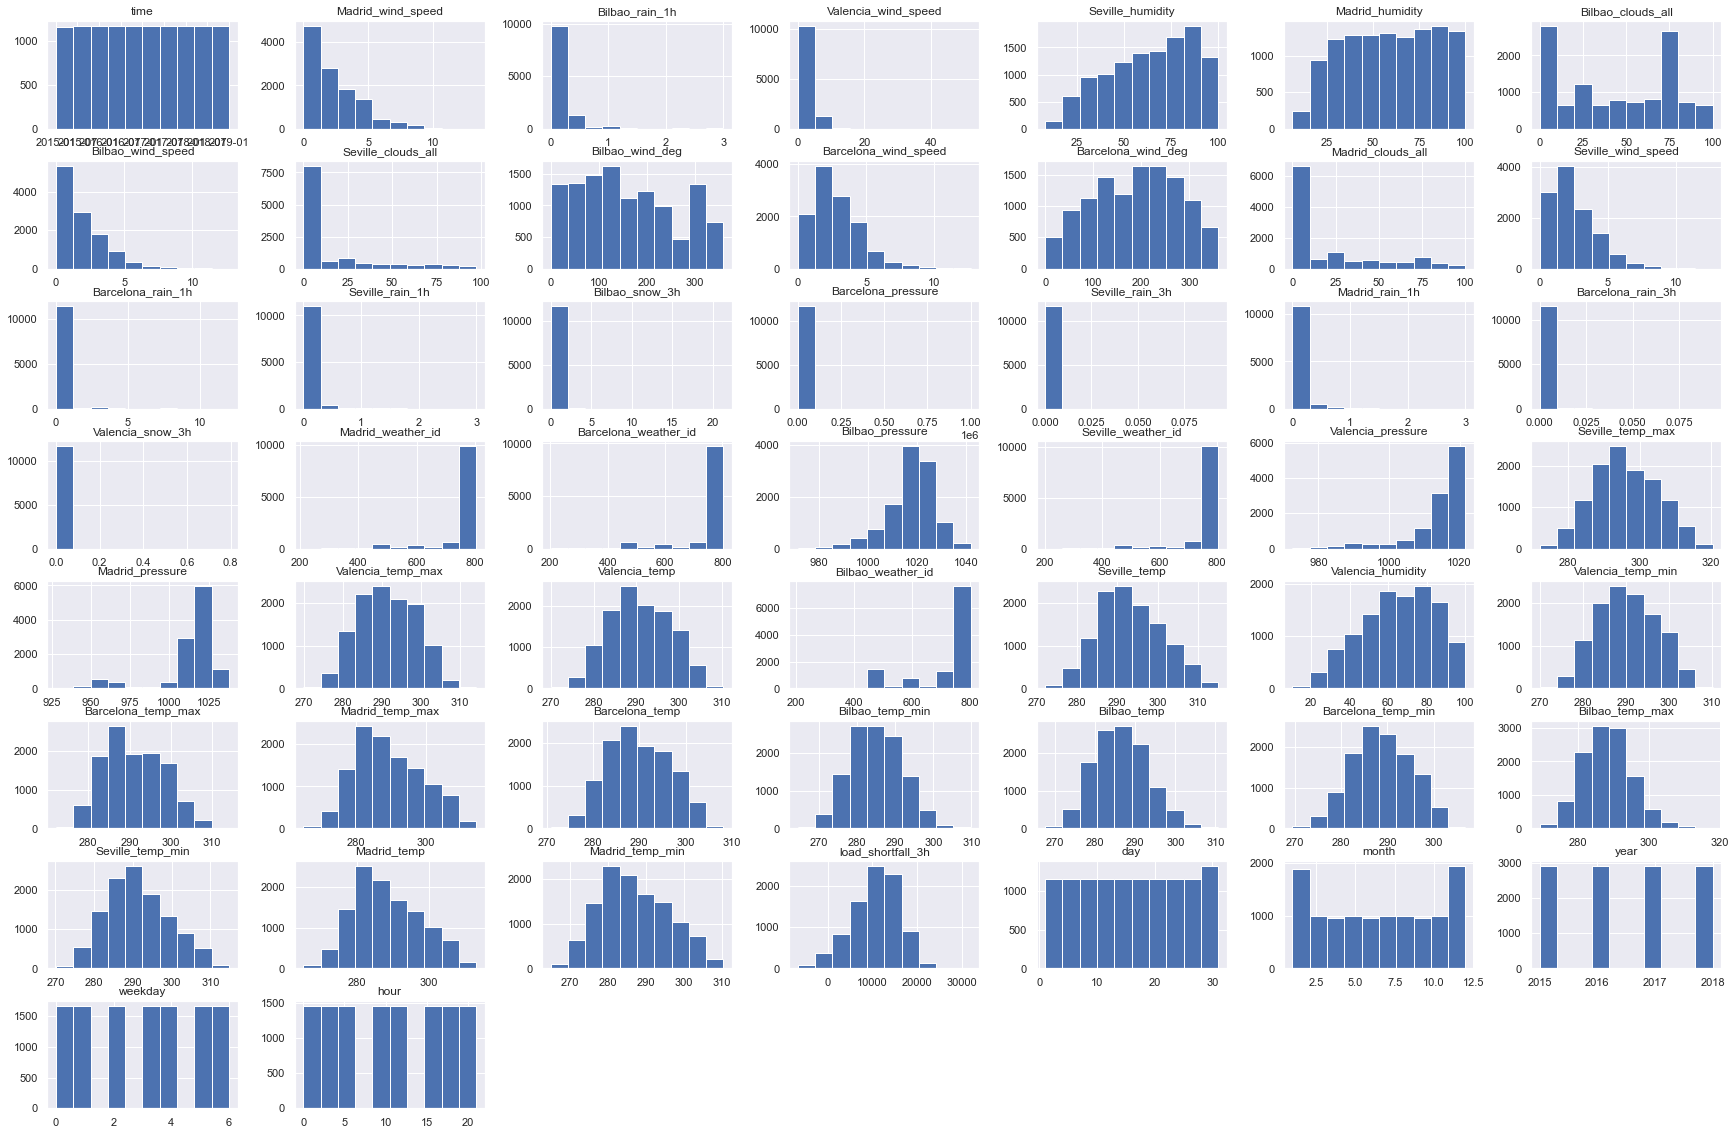

In [ ]:
# Using Pairplot method to understand the distribution of each variable
df.hist(figsize=(30,20))
plt.show()

## Categorical variables

In [ ]:
#separate categorical data from numeric
categorical_df = df.select_dtypes(exclude=[np.number])
categorical_df.head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


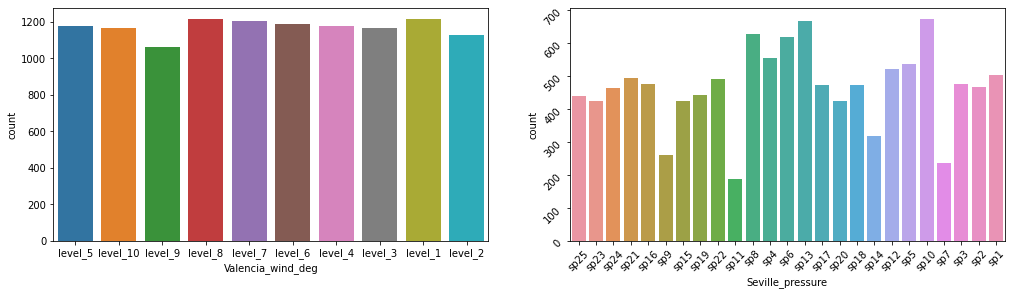

In [ ]:
#Plot countplots of categorical data
fig, ax =plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x=categorical_df['Valencia_wind_deg'], ax=ax[0])
sns.countplot(x=categorical_df['Seville_pressure'], ax=ax[1])
ax[1].tick_params(labelrotation=45)
fig.tight_layout(pad=4.0)

In [ ]:
df['Valencia_wind_deg'].value_counts()

level_8     1212
level_1     1212
level_7     1201
level_6     1184
level_4     1177
level_5     1175
level_10    1167
level_3     1167
level_2     1126
level_9     1062
Name: Valencia_wind_deg, dtype: int64

We can see that Level_8 and level_1 are the most common wind level at Valencia and level_9 is the least common .

In [ ]:
df['Seville_pressure'].value_counts()

sp10    673
sp13    668
sp8     629
sp6     619
sp4     555
sp5     537
sp12    523
sp1     503
sp21    495
sp22    493
sp3     477
sp16    476
sp17    473
sp18    472
sp2     467
sp24    464
sp19    442
sp25    441
sp15    426
sp20    425
sp23    424
sp14    318
sp9     259
sp7     235
sp11    189
Name: Seville_pressure, dtype: int64

We can see that the sp10 is the most common atmospheric pressure in Seville

## Multivariate Analysis

In [ ]:
df['time']=pd.to_datetime(df['time'])

In [ ]:
#seperating time into day,month,year,week and hour
df["day"] = df["time"].dt.day
df["month"] = df["time"].dt.month
df["year"] = df["time"].dt.year
df["weekday"] = df["time"].dt.weekday
df["hour"] = df["time"].dt.hour

Text(0.5, 1.0, 'Spain Electricity Shortfall')

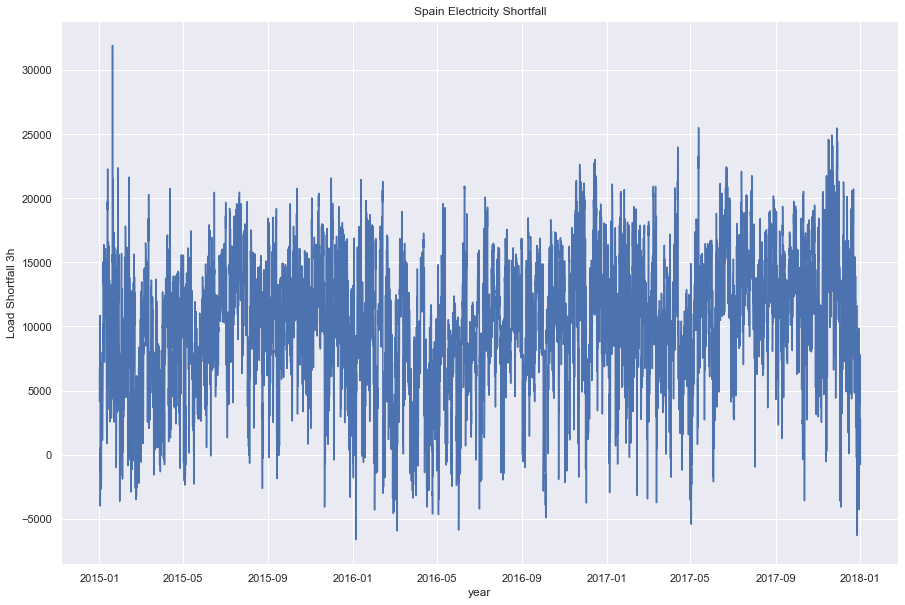

In [ ]:
#lineplot for spain Electricity shortfall againist year
sns.set(rc = {'figure.figsize':(15,10)})
plt.plot(df.time, df.load_shortfall_3h)
plt.xlabel('year')
plt.ylabel('Load Shortfall 3h')
plt.title('Spain Electricity Shortfall')

---
In 2015 February that is when Spain experienced the most electricity shortfall followed by 2017 may and 2017 December 

---

We will now look at the correlation of each variable to the response by looking at it's correlation with the response variable.

We will also make sure we try and avoid multicollinearity.

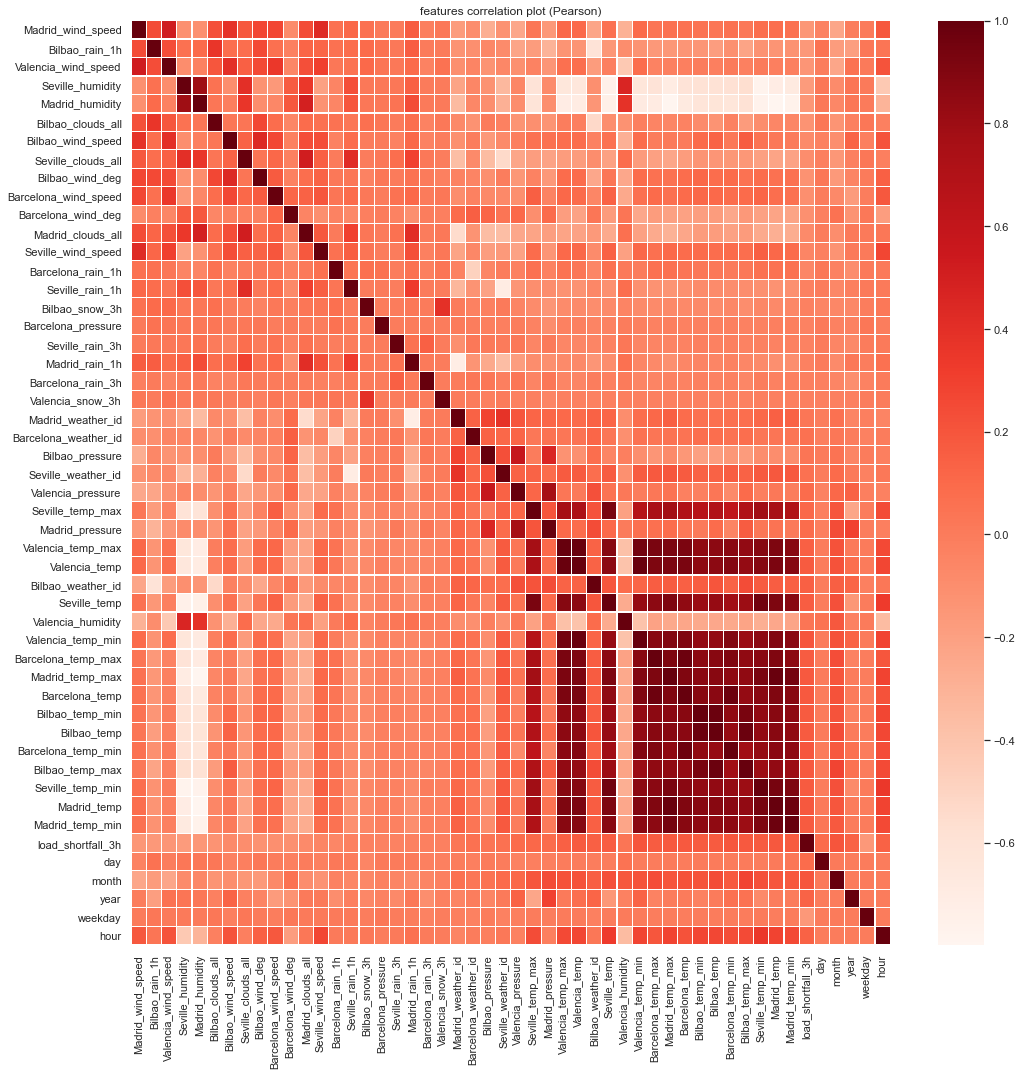

In [ ]:
# evaluate correlation
plt.figure(figsize = (17,17))
plt.title('features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

From the plot we can see that some variables are highly correlated with each other. To avoid collinearity we will have to drop variables that are highly correlated 

 <a id="five"></a>
## Data Engineering

In [ ]:
# Extracting numeric values from Valencia_wind_deg and Seville_pressure columns
# Changing Valencia_wind_deg and Seville_pressure dtype from object to int64
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
df[['Valencia_wind_deg','Seville_pressure']] = df[['Valencia_wind_deg','Seville_pressure']].apply(pd.to_numeric)

In [ ]:
# Create correlation matrix and drop highly correlated features
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

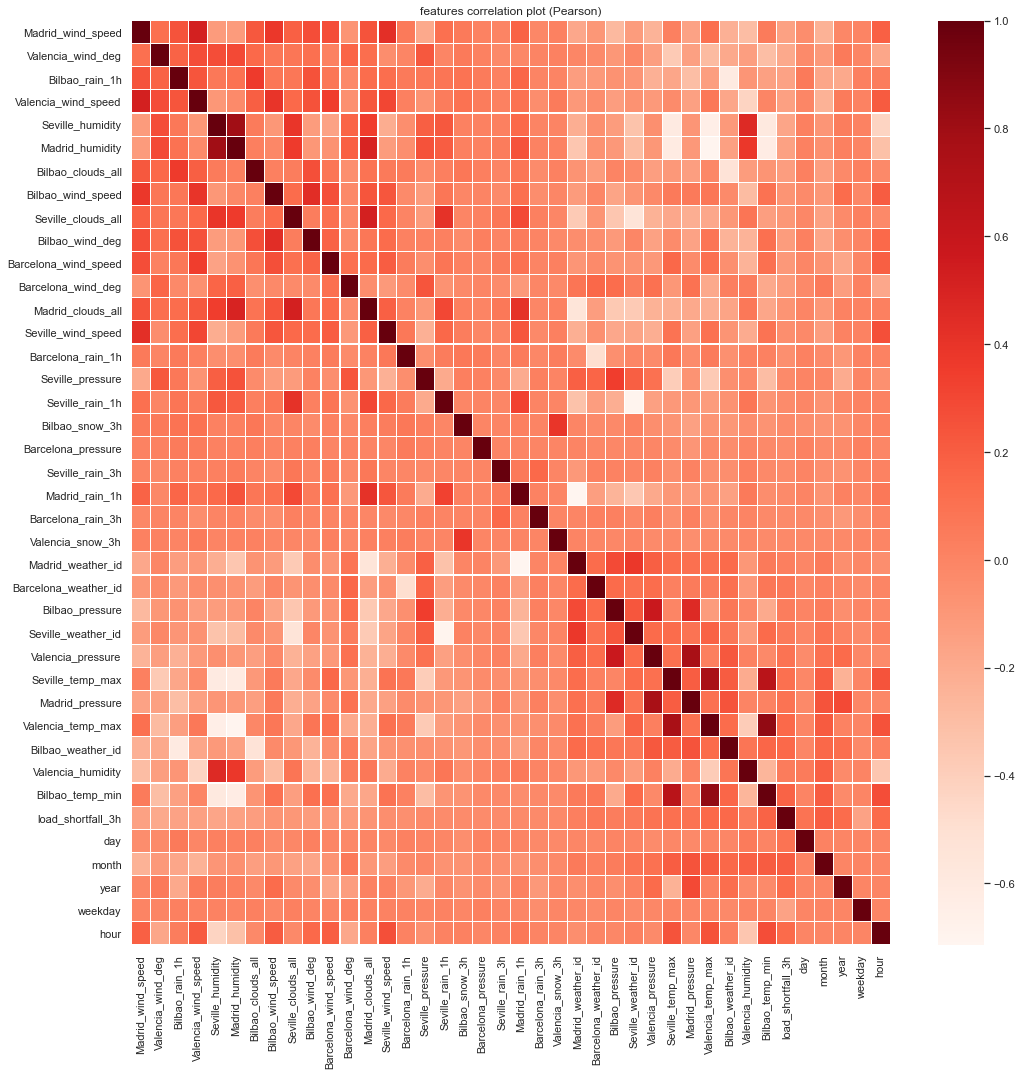

In [ ]:
# evaluate correlation
plt.figure(figsize = (17,17))
plt.title('features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

It seems like most of the colinearity has been dealt with.

In [ ]:
# Reorder columns so that our response variable is the last column of the dataframe
column_titles = [col for col in df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df = df.reindex(columns=column_titles)

In [ ]:
df=df.drop(['time'],axis=1)

<a id="six"></a>
##  Modelling

### Preparing for modelling

In [ ]:
X = df[:len(df_train)].drop('load_shortfall_3h', axis=1)
y = df[:len(df_train)][['load_shortfall_3h']]

In [ ]:
#standardising the data
scaler = StandardScaler()
X_transformed=scaler.fit_transform(X)

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=1,shuffle=False)

### Base models


- __Linear regression__ Is a linear relationship between the independent variables(x) and a dependant variable(y).

In [ ]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

- __LASSO__ (Least Absolute Shrinkage and Selection Operator) it uses shrinkage which reduces coefficients of the model.

In [ ]:
#Lasso Reg
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

- __Decision Tree__ is 

In [ ]:
dtree = DecisionTreeRegressor(max_depth=6,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

- __Random Forest__ uses  decision tree as a base estimator. Each estimator is trained on a different bootstrap sample having the same size as the training set. 

In [ ]:
RF = RandomForestRegressor(n_estimators=300, max_depth=7,random_state=7)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=300, random_state=7)

<a id="seven"></a>
## model Performance

In [ ]:
#Compare models

# Make training set predictions for each model
train_lin = linreg.predict(X_train)
train_lasso = lasso.predict(X_train)
train_DcT = dtree.predict(X_train)
train_RnF = RF.predict(X_train)

# Make test set predictions for each model
test_lin = linreg.predict(X_test)
test_lasso = lasso.predict(X_test)
test_DcT = dtree.predict(X_test)
test_RnF = RF.predict(X_test)

# Dictionary of results
results_dict = {'Training MSE':{
                        "Linear Regression":metrics.mean_squared_error(y_train, train_lin,squared=False),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_train, train_DcT,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_train, train_RnF,squared=False)
                },
                'Test MSE':{
                        "Linear Regression": metrics.mean_squared_error(y_test, test_lin,squared=False),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_test, test_DcT,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_test, test_RnF,squared=False)
                }
                }
results=pd.DataFrame(results_dict)

results

,Training MSE,Test MSE
Linear Regression,4770.293880,4853.305321
LASSO,4770.295059,4853.255530
Decision Tree,3530.453097,4817.940277
Random Forest,2962.576788,4382.616164


From the results of the base models we can see that the random forest performs the best followed by decision tree. As such we will further improve random forest.